In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro ,kruskal

import warnings
warnings.filterwarnings('ignore')

In [120]:
my_file="vgsales.csv"
df=pd.read_csv(my_file)
df.shape
#voir le type de données 
df.info()
#voir le nombre de catégorie de chaque type objet 
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


In [121]:
#statistqiue descriptive
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#matrice des valeurs manquantes
msno.matrix(df)
plt.show()


In [ ]:
#remplacer les valeurs manquantes
df["Year"]= df["Year"].fillna(df["Year"].median())
df["Publisher"]=df["Publisher"].fillna(df["Publisher"].mode()[0]) #le 0 pour choisir le premier mode

msno.matrix(df)
plt.show()

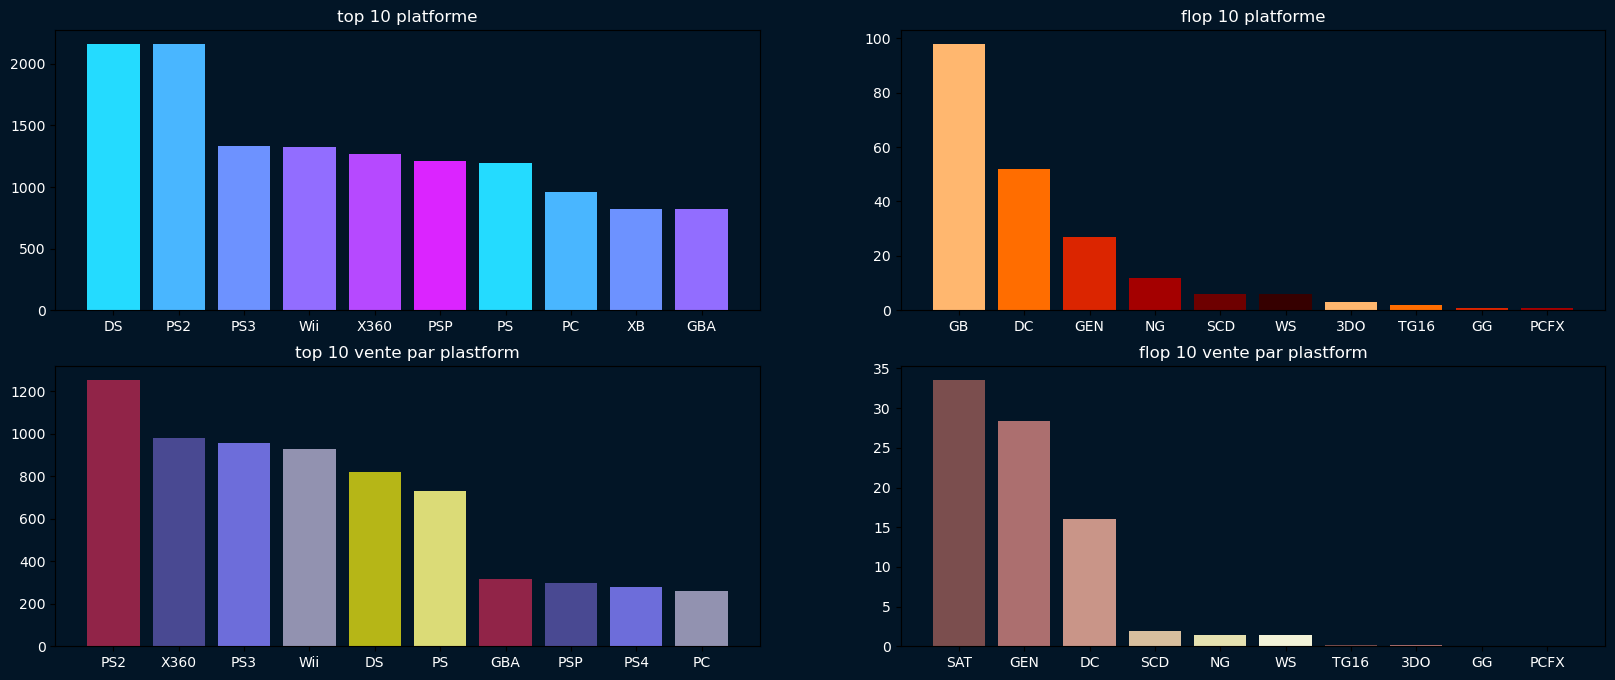

In [124]:
nbr_platforme= df["Platform"].value_counts().reset_index()
sales_platforme=df.groupby("Platform")["Global_Sales"].sum().reset_index()
sales_platforme=sales_platforme.sort_values(by="Global_Sales",ascending=False)

#les 10 première platforme
top_10_platforme = nbr_platforme.head(10)
top_10_vente_platform=sales_platforme.head(10)

#les 10 dernière platforme
flo_platforme= nbr_platforme.tail(10)
flop_10_vente_plastform=sales_platforme.tail(10)

#visualisation 
plt.figure(figsize=(20,8)).patch.set_facecolor('#021526')
plt.subplot(2,2,1)
plt.bar(top_10_platforme["Platform"],top_10_platforme["count"], color=sns.color_palette("cool"))
plt.title("top 10 platforme",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,2)
plt.bar(flo_platforme["Platform"],flo_platforme["count"],color=sns.color_palette("gist_heat_r"))
plt.title("flop 10 platforme",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,3)
plt.bar(top_10_vente_platform["Platform"],top_10_vente_platform["Global_Sales"],color=sns.color_palette("gist_stern"))
plt.title('top 10 vente par plastform', color='white')
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,4)
plt.bar(flop_10_vente_plastform["Platform"],flop_10_vente_plastform["Global_Sales"],color=sns.color_palette("pink"))
plt.title('flop 10 vente par plastform', color='white')
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()


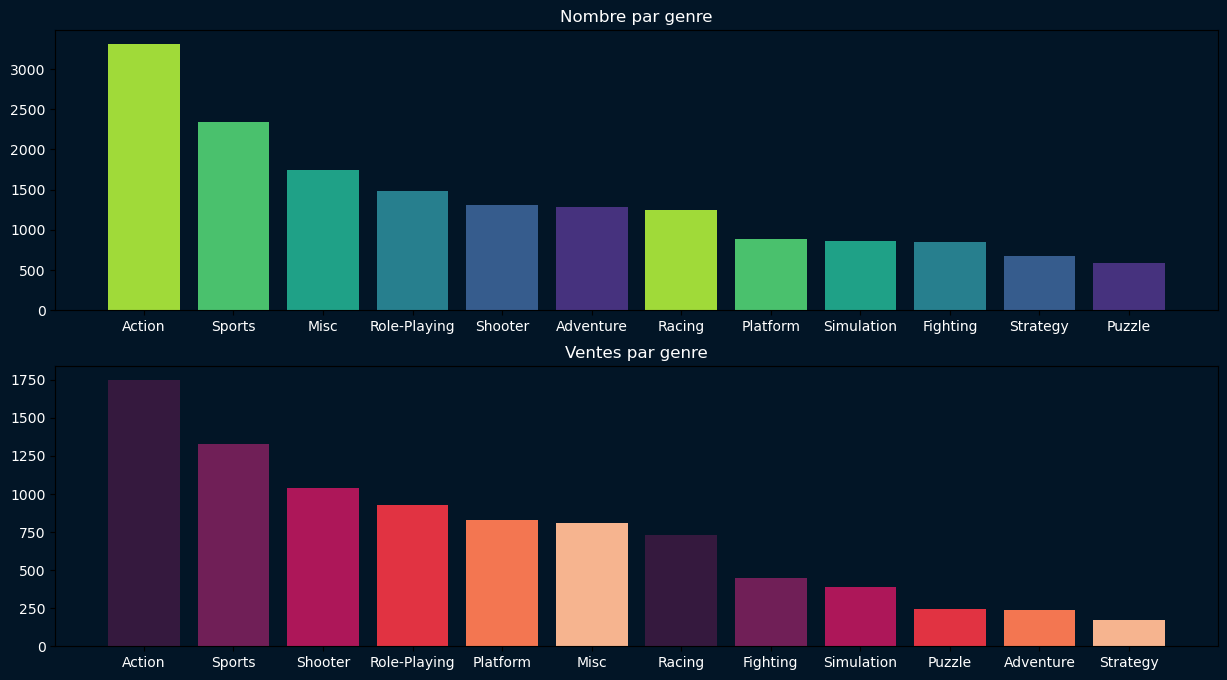

In [125]:
nbr_genre=df["Genre"].value_counts().reset_index()
sales_genre =df.groupby("Genre")["Global_Sales"].sum().reset_index()
sales_genre=sales_genre.sort_values(by="Global_Sales",ascending=False)

top_5_genre=nbr_genre.head(5)
top_5_vente_genre=sales_genre.head(5)

plt.figure(figsize=(15,8)).patch.set_facecolor('#021526')
plt.subplot(2,1,1)
plt.bar(nbr_genre["Genre"],nbr_genre["count"],color=sns.color_palette('viridis_r'))
plt.title("Nombre par genre",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,1,2)
plt.bar(sales_genre["Genre"],sales_genre["Global_Sales"],color=sns.color_palette('rocket'))
plt.title("Ventes par genre",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

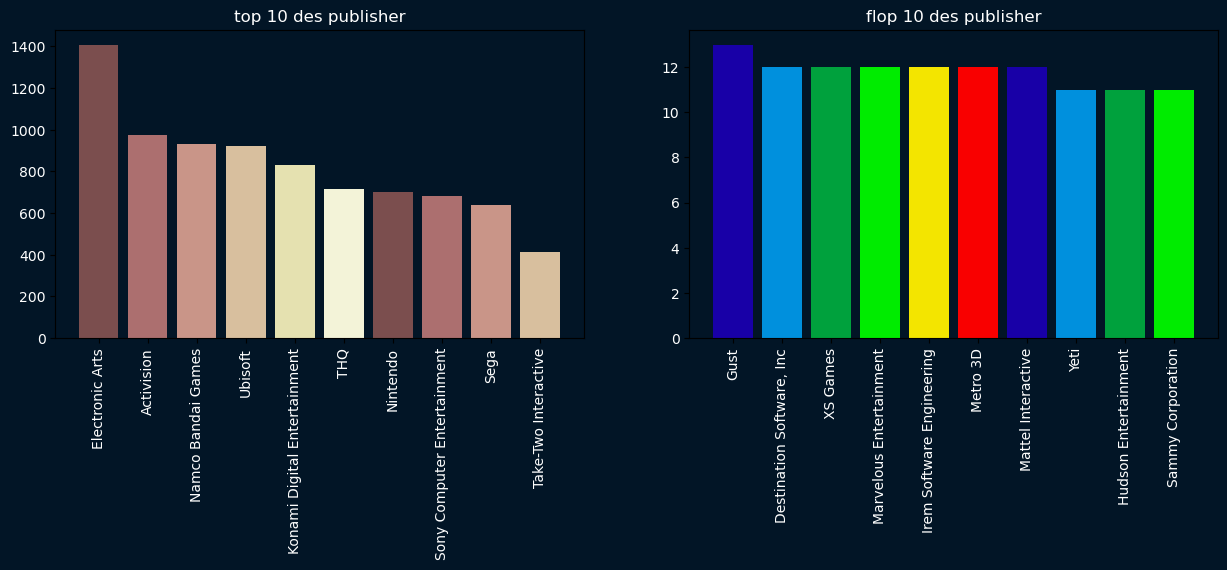

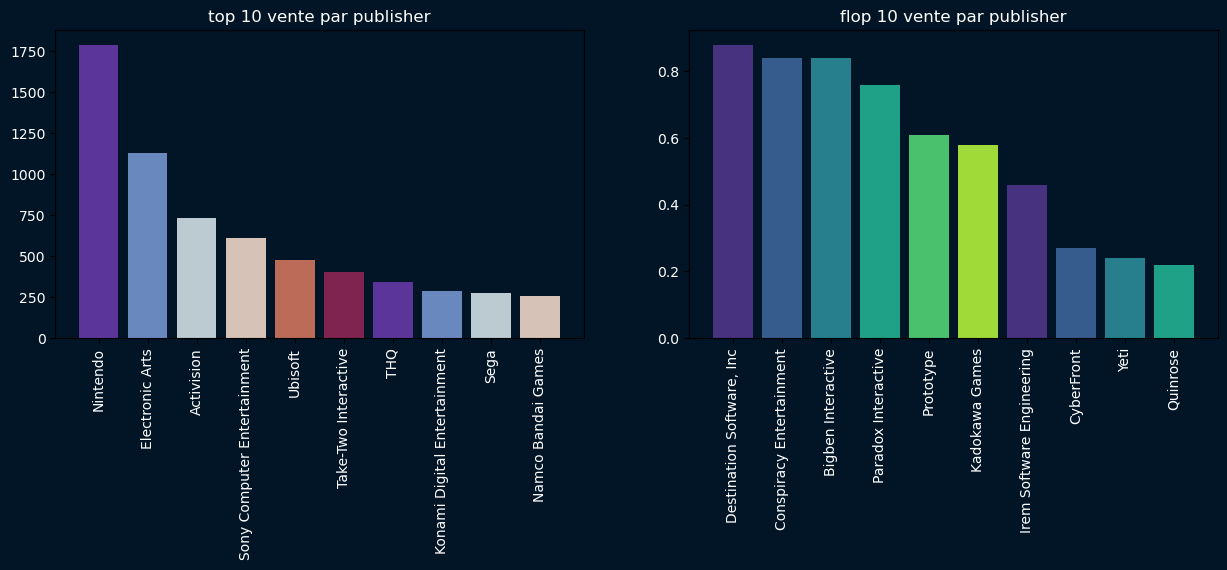

In [126]:
nbr_publisher= df["Publisher"].value_counts().reset_index()
nbr_publisher.colums=["Publisher","count"]
nbr_publisher=nbr_publisher[nbr_publisher["count"]> 10]
#nbr_publisher=nbr_publisher.loc[nbr_publisher["count"]> 10]

df_publisher=df.loc[df["Publisher"].isin(nbr_publisher['Publisher'])]

sales_publisher=df_publisher.groupby("Publisher")["Global_Sales"].sum().reset_index().sort_values(by="Global_Sales",ascending=False)


nbr_publisher=nbr_publisher.loc[nbr_publisher["count"]> 10]

top_10_publisher = nbr_publisher.head(10)
top_10_sales_publisher=sales_publisher.head(10)

flop_publisher=nbr_publisher.tail(10)
flop_vente_publisher=sales_publisher.tail(10)



plt.figure(figsize=(15,4)).patch.set_facecolor('#021526')
plt.subplot(1,2,1)
plt.bar(top_10_publisher["Publisher"],top_10_publisher["count"],color=sns.color_palette("pink"))
plt.title("top 10 des publisher",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.bar(flop_publisher["Publisher"], flop_publisher["count"],color=sns.color_palette("nipy_spectral"))
plt.title("flop 10 des publisher",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

plt.figure(figsize=(15,4)).patch.set_facecolor('#021526')
plt.subplot(1,2,1)
plt.bar(top_10_sales_publisher["Publisher"],top_10_sales_publisher["Global_Sales"],color=sns.color_palette("twilight_shifted"))
plt.title("top 10 vente par publisher",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.bar(flop_vente_publisher["Publisher"],flop_vente_publisher["Global_Sales"],color=sns.color_palette("viridis"))
plt.title("flop 10 vente par publisher",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.show()

Index(['region', 'sales'], dtype='object')


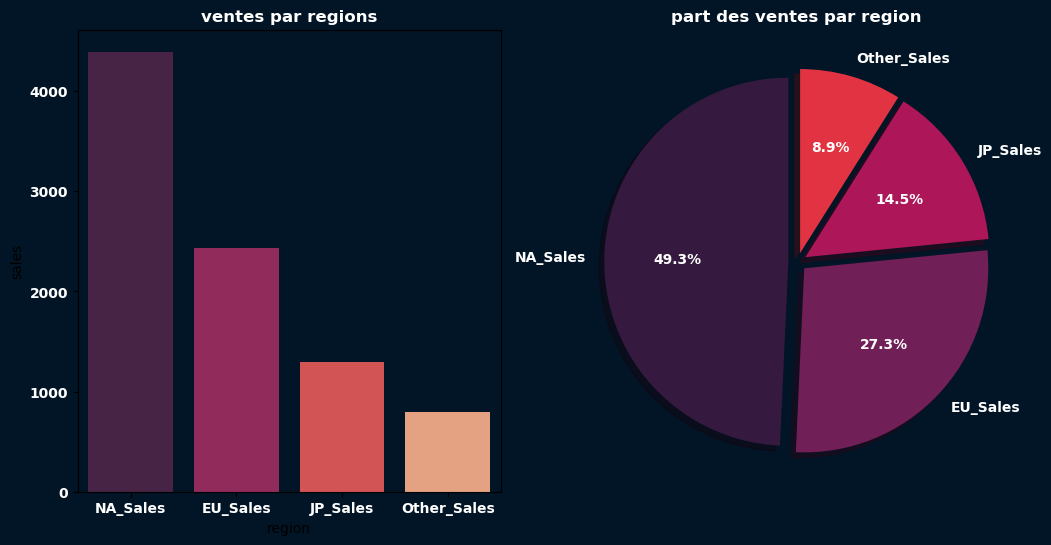

In [127]:
#vente par regions
total_sales=df[["EU_Sales","NA_Sales","JP_Sales","Other_Sales"]].sum().reset_index()
total_sales.columns=["region","sales"]
print(total_sales.columns)

total_sales=total_sales.sort_values("sales",ascending=False)
labels= total_sales["region"]
#visualisation de la somme
plt.figure(figsize=(12,6)).patch.set_facecolor('#021526') #changer la couleur de l'arrière plan
plt.subplot(1,2,1).patch.set_facecolor("WHITE")
sns.barplot(data=total_sales,x="region",y="sales", palette="rocket")
plt.title("ventes par regions",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

#visualisation du poucentage 
ax= plt.subplot(1,2,2)
wedges, texts,autotexts = ax.pie(total_sales["sales"],
        labels= labels,
        autopct='%1.1f%%' ,#AFFICHER LE %
        startangle=90,
        colors=sns.color_palette('rocket'),
        explode=[0.05]*len(labels),
        shadow=True)
plt.title("part des ventes par region",color="white", fontweight="bold")
plt.setp(autotexts, color='white',fontweight="bold") #change les valeurs 
plt.setp(texts, fontweight="bold",color="white")
plt.axis("equal")
plt.show()

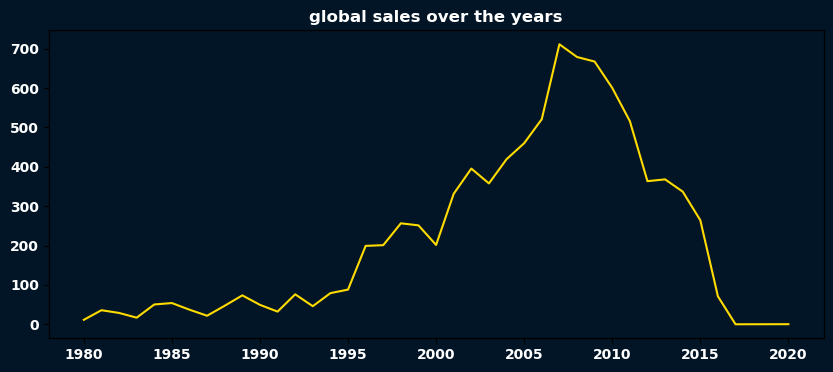

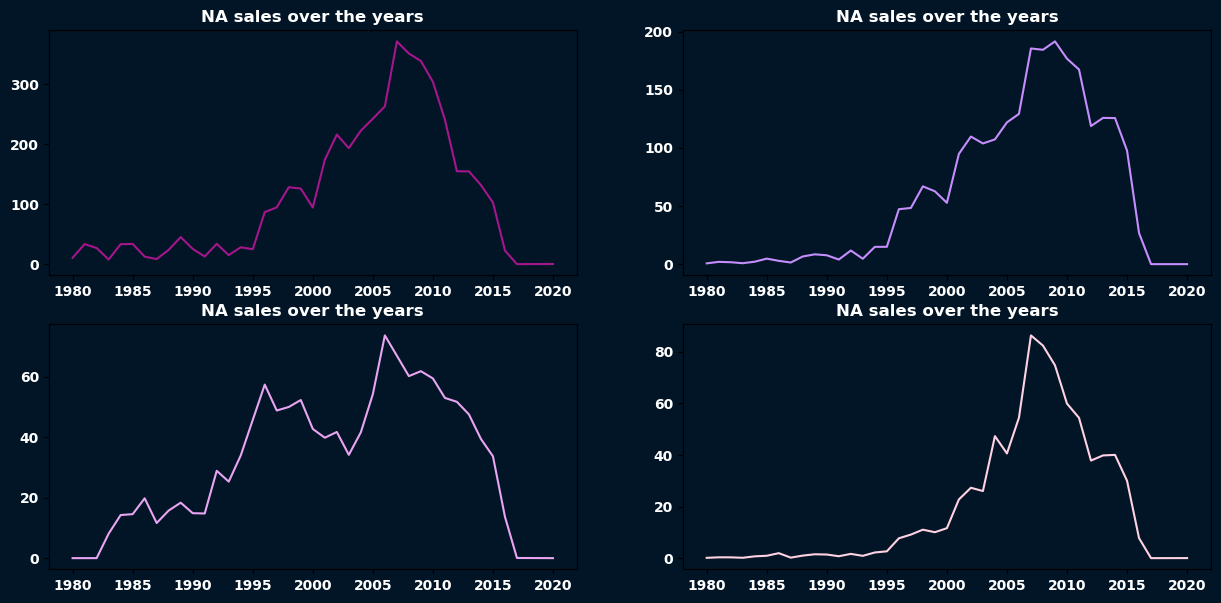

In [128]:
#distribution annuelle 
dist_years=df.groupby("Year")["Global_Sales"].sum().reset_index()

plt.figure(figsize=(10,4)).patch.set_facecolor("#021526")
plt.plot(dist_years['Year'],dist_years["Global_Sales"],color="#FFDB00")
plt.title("global sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")
plt.show()

dist_years_NA=df.groupby("Year")["NA_Sales"].sum().reset_index()
dist_years_EU=df.groupby("Year")["EU_Sales"].sum().reset_index()
dist_years_JP=df.groupby("Year")["JP_Sales"].sum().reset_index()
dist_years_OTHER=df.groupby("Year")["Other_Sales"].sum().reset_index()

plt.figure(figsize=(15,7)).patch.set_facecolor("#021526")
plt.subplot(2,2,1)
plt.plot(dist_years_NA['Year'],dist_years_NA["NA_Sales"],color="#A5158C")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

plt.subplot(2,2,2)
plt.plot(dist_years_EU['Year'],dist_years_EU["EU_Sales"],color="#C68EFD")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

plt.subplot(2,2,3)
plt.plot(dist_years_JP['Year'],dist_years_JP["JP_Sales"],color="#E9A5F1")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

plt.subplot(2,2,4)
plt.plot(dist_years_OTHER['Year'],dist_years_OTHER["Other_Sales"],color="#FED2E2")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")
plt.show()


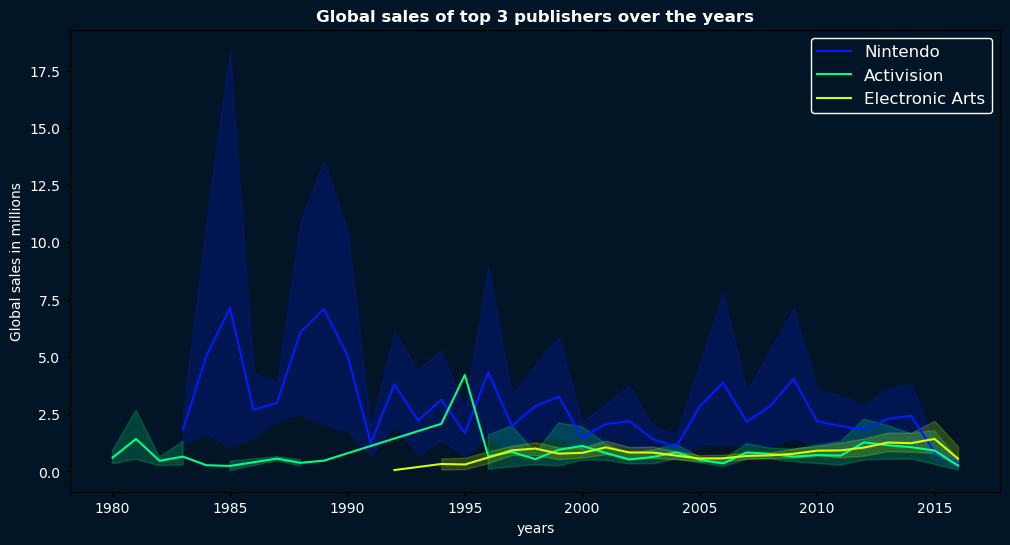

In [129]:
#Distribution par années des 5 premier publisher 
top_5_Publisher=sales_publisher.head(3)

df_5publisher_sales=df.loc[df["Publisher"].isin(top_5_Publisher["Publisher"])]

plt.figure(figsize=(12,6), facecolor="#021526")
sns.lineplot(x="Year",
             y="Global_Sales",
             hue="Publisher",
             data=df_5publisher_sales,
             palette="gist_rainbow_r"
             )
plt.title("Global sales of top 3 publishers over the years",color="white", fontweight="bold")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.ylabel("Global sales in millions", color="white")
plt.xlabel("years", color="white")
plt.legend(loc="upper right",
           fontsize=12,
           facecolor="#021526",
           edgecolor="white",
           labelcolor="white",
           framealpha=1,
           )



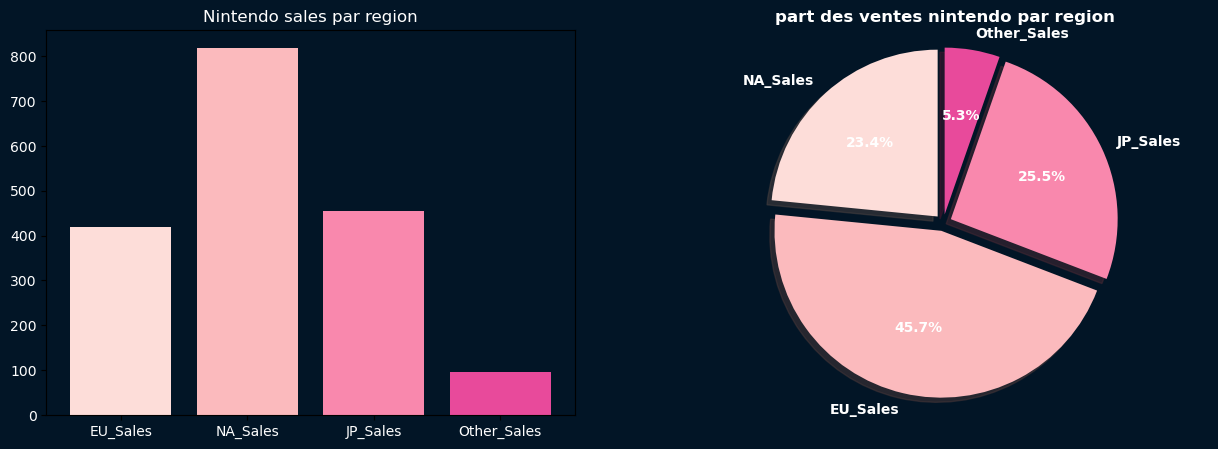

In [130]:
#on prend le publisher avec le plus de vente pour l'analyser par region
df_nintendo=df.loc[df["Publisher"]=="Nintendo"]

total_sales_nintendo=df_nintendo[["EU_Sales","NA_Sales","JP_Sales","Other_Sales"]].sum().reset_index()
total_sales_nintendo.columns=["region","sales"]

plt.figure(figsize=(15,5) ,facecolor="#021526")
plt.subplot(1,2,1)
plt.bar(total_sales_nintendo["region"],total_sales_nintendo["sales"], color=sns.color_palette("RdPu"))
plt.title("Nintendo sales par region", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

#visualisation du poucentage 
ax= plt.subplot(1,2,2)
wedges, texts,autotexts = ax.pie(total_sales_nintendo["sales"],
        labels= labels,
        autopct='%1.1f%%' ,#AFFICHER LE %
        startangle=90,
        colors=sns.color_palette('RdPu'),
        explode=[0.05]*len(labels),
        shadow=True)
plt.title("part des ventes nintendo par region",color="white", fontweight="bold")
plt.setp(autotexts, color='white',fontweight="bold") #change les valeurs 
plt.setp(texts, fontweight="bold",color="white")
plt.axis("equal")
plt.show()




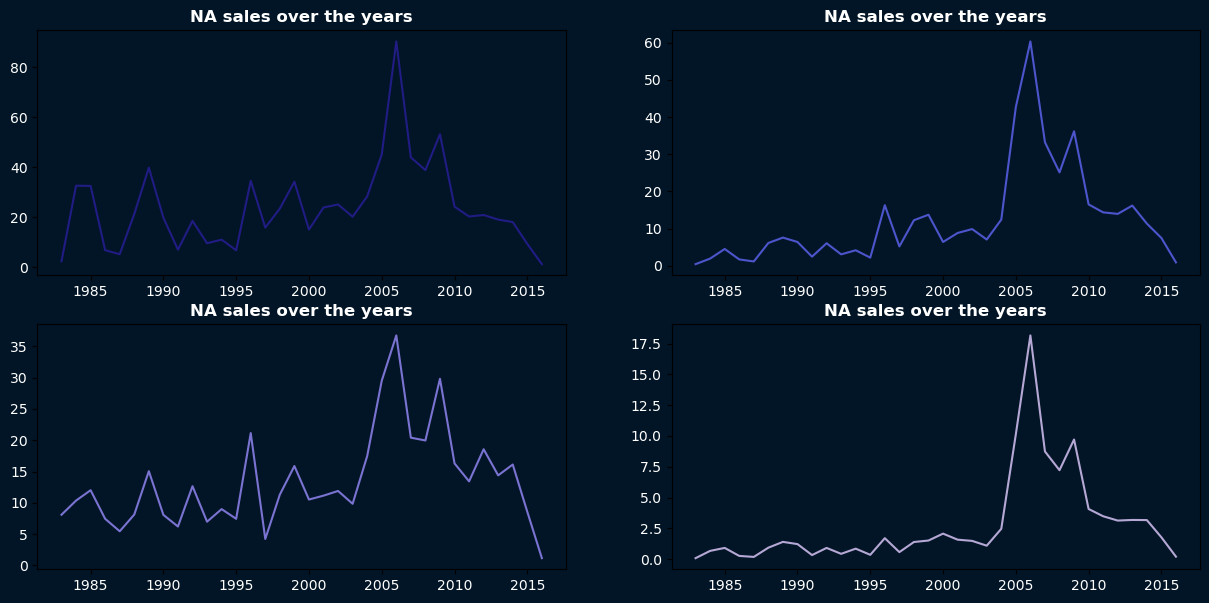

In [131]:
#vente nintendo par region over the years 

dist_years_NA=df_nintendo.groupby("Year")["NA_Sales"].sum().reset_index()
dist_years_EU=df_nintendo.groupby("Year")["EU_Sales"].sum().reset_index()
dist_years_JP=df_nintendo.groupby("Year")["JP_Sales"].sum().reset_index()
dist_years_OTHER=df_nintendo.groupby("Year")["Other_Sales"].sum().reset_index()

plt.figure(figsize=(15,7)).patch.set_facecolor("#021526")
plt.subplot(2,2,1)
plt.plot(dist_years_NA['Year'],dist_years_NA["NA_Sales"],color="#211C84")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")

plt.subplot(2,2,2)
plt.plot(dist_years_EU['Year'],dist_years_EU["EU_Sales"],color="#4D55CC")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")

plt.subplot(2,2,3)
plt.plot(dist_years_JP['Year'],dist_years_JP["JP_Sales"],color="#7A73D1")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")

plt.subplot(2,2,4)
plt.plot(dist_years_OTHER['Year'],dist_years_OTHER["Other_Sales"],color="#B5A8D5")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()


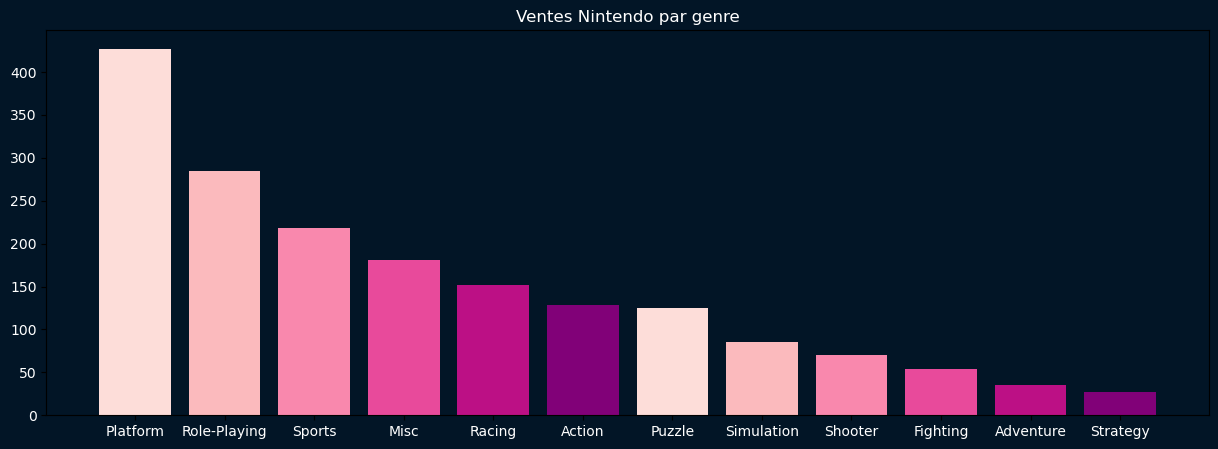

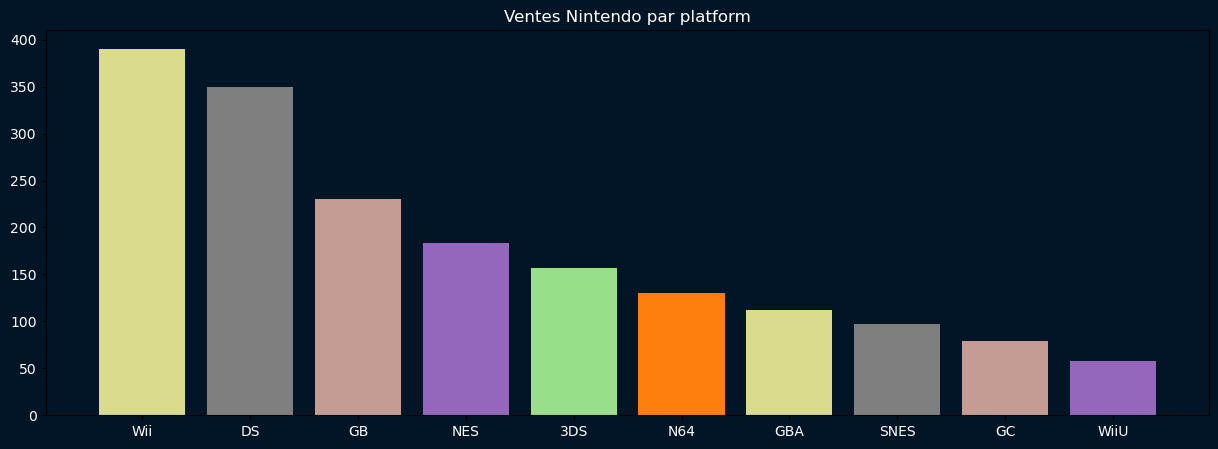

In [132]:
# ventes nintendo par genre 

sales_genre_nintendo =df_nintendo.groupby("Genre")["Global_Sales"].sum().reset_index()
sales_genre_nintendo=sales_genre_nintendo.sort_values(by="Global_Sales",ascending=False)


plt.figure(figsize=(15,5)).patch.set_facecolor('#021526')
plt.bar(sales_genre_nintendo["Genre"],sales_genre_nintendo["Global_Sales"],color=sns.color_palette('RdPu'))
plt.title("Ventes Nintendo par genre",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

#top 5 publisher de nintendo 

sales_platform_nintendo =df_nintendo.groupby("Platform")["Global_Sales"].sum().reset_index()
sales_platform_nintendo=sales_platform_nintendo.sort_values(by="Global_Sales",ascending=False)
sales_platform_nintendo=sales_platform_nintendo.head(10)

plt.figure(figsize=(15,5)).patch.set_facecolor('#021526')
plt.bar(sales_platform_nintendo["Platform"],sales_platform_nintendo["Global_Sales"],color=sns.color_palette("tab20_r"))
plt.title("Ventes Nintendo par platform",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()


In [133]:
#Relation entre les vente globales et le genre
#teste de la normalité de la distribution
for genre in df["Genre"].unique() : 
    data=df[df["Genre"]== genre]["Global_Sales"]
    stat, p = shapiro(data)
    print(f"Genre: {genre} - Stat={stat:.3f}, p-value={p:.3f}")
#pas de distribution normale

Genre: Sports - Stat=0.153, p-value=0.000
Genre: Platform - Stat=0.318, p-value=0.000
Genre: Racing - Stat=0.283, p-value=0.000
Genre: Role-Playing - Stat=0.320, p-value=0.000
Genre: Puzzle - Stat=0.205, p-value=0.000
Genre: Misc - Stat=0.283, p-value=0.000
Genre: Shooter - Stat=0.410, p-value=0.000
Genre: Simulation - Stat=0.304, p-value=0.000
Genre: Action - Stat=0.403, p-value=0.000
Genre: Fighting - Stat=0.510, p-value=0.000
Genre: Adventure - Stat=0.302, p-value=0.000
Genre: Strategy - Stat=0.442, p-value=0.000


In [134]:
#test kruskal (non parametré)
for genre in df["Genre"].unique():
    data= df[df["Genre"]==genre]["Global_Sales"]
    stat, p =kruskal(*data)
    print(f"kruskal-walis stat={stat:3f},p-value={p:3f}")
# on conclu que les vente globale ne sont pas influencé par le genre

kruskal-walis stat=2345.000000,p-value=0.496116
kruskal-walis stat=885.000000,p-value=0.493678
kruskal-walis stat=1248.000000,p-value=0.494676
kruskal-walis stat=1487.000000,p-value=0.495123
kruskal-walis stat=581.000000,p-value=0.492198
kruskal-walis stat=1738.000000,p-value=0.495489
kruskal-walis stat=1309.000000,p-value=0.494802
kruskal-walis stat=866.000000,p-value=0.493609
kruskal-walis stat=3315.000000,p-value=0.496734
kruskal-walis stat=847.000000,p-value=0.493538
kruskal-walis stat=1285.000000,p-value=0.494754
kruskal-walis stat=680.000000,p-value=0.492788


In [135]:
#relation entre les ventes de chaque region et genre
#teste de normalité NA_sales
for genre in df["Genre"].unique():
    data1=df[df["Genre"]== genre]["NA_Sales"]
    stat, p=shapiro(data1)
    print(f"genre : {genre} - stat={stat:3f},p-value={p:3f}")
#la distribution n'est pas normale

for genre in df["Genre"].unique():
    data2=df[df["Genre"]== genre]["EU_Sales"]
    stat, p = shapiro(data2)
    print(stat,p)

genre : Sports - stat=0.176475,p-value=0.000000
genre : Platform - stat=0.285917,p-value=0.000000
genre : Racing - stat=0.329858,p-value=0.000000
genre : Role-Playing - stat=0.323145,p-value=0.000000
genre : Puzzle - stat=0.136983,p-value=0.000000
genre : Misc - stat=0.294720,p-value=0.000000
genre : Shooter - stat=0.332575,p-value=0.000000
genre : Simulation - stat=0.420139,p-value=0.000000
genre : Action - stat=0.440023,p-value=0.000000
genre : Fighting - stat=0.528911,p-value=0.000000
genre : Adventure - stat=0.284472,p-value=0.000000
genre : Strategy - stat=0.351942,p-value=0.000000
0.14904934167861938 0.0
0.37559109926223755 0.0
0.28654831647872925 0.0
0.24558615684509277 0.0
0.26492202281951904 7.88931035414872e-43
0.25631600618362427 0.0
0.44065529108047485 0.0
0.22458255290985107 0.0
0.3779454827308655 0.0
0.5041609406471252 2.1579996350602183e-43
0.28795844316482544 0.0
0.34825563430786133 1.0229478789571165e-43


In [136]:
#test kruskal region
for genre in df["Genre"].unique():
    data3= df[df["Genre"]==genre]["NA_Sales"]
    stat, p = kruskal(*data3)
    print(stat,p)

for genre in df["Genre"].unique():
    data=df[df["Genre"]==genre]["EU_Sales"]
    stat, p = kruskal(*data)
    print(stat,p)

2344.9999999999995 0.49611640047529226
884.9999999999997 0.49367824590466347
1247.9999999999998 0.49467646187087777
1486.9999999999995 0.49512301342572196
580.9999999999998 0.4921976759388456
1737.9999999999993 0.4954889079176003
1308.9999999999995 0.49480198343152176
865.9999999999999 0.49360927093063434
3315.000000000001 0.4967336441538982
846.9999999999999 0.4935379878410704
1285.0000000000002 0.494753665378597
680.0000000000002 0.4927879886383622
2344.999999999999 0.4961164004752949
884.9999999999997 0.49367824590466347
1247.9999999999995 0.49467646187087966
1486.9999999999995 0.49512301342572196
580.9999999999999 0.4921976759388443
1737.9999999999993 0.4954889079176003
1308.9999999999998 0.49480198343152
865.9999999999995 0.49360927093063756
3314.999999999999 0.4967336441539071
847.0 0.4935379878410693
1284.9999999999993 0.4947536653786041
680.0000000000002 0.4927879886383622


In [137]:
#filtrer les platforme >= à 3 pour le test de shapiro
counts=df["Platform"].value_counts()
print(counts)
df_valide= counts[counts >= 10].index   #indexe on récupee le nom des platforme dans une liste d'étiquette
print(df_valide)

df_plat=df.loc[df["Platform"].isin(df_valide)] #prendre que les platforme qui se trouve dans df_valide


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64
Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG'],
      dtype='object', name='Platform')


In [138]:
#relation platforme et vente
#teste de distribution normale
for platforme in df_plat["Platform"].unique():
    data=df_plat[df_plat["Platform"]==platforme]["Global_Sales"]
    stat,p = shapiro(data)
    #print(f"platforme : {platforme} - stat={stat:3f},p-value={p:3f}")
#distribution pas normale 
#teste kruskal 

for platforme in df_plat["Platform"].unique():
    data = df_plat[df_plat["Platform"]==platforme]["Global_Sales"]
    stat, p=kruskal(*data)
    print(stat, p )

1323.9999999999993 0.4948315127566017
97.00000000000006 0.4809029893713593
97.00000000000004 0.48090298937135967
2161.9999999999995 0.4959553756561614
1263.9999999999998 0.4947102630465991
1328.0000000000005 0.49483930262268133
2159.9999999999995 0.4959535035589663
237.99999999999997 0.48780911528463966
820.9999999999998 0.4934364609121203
508.00000000000006 0.4916558641118329
334.99999999999994 0.4897246738083101
318.0000000000001 0.48945357642300674
1195.0000000000005 0.49455968709551434
822.9999999999999 0.49344444111505953
959.0000000000001 0.4939270526820991
132.0 0.4836298688263271
1211.9999999999995 0.4945979765419334
211.99999999999991 0.4870831040962989
554.9999999999999 0.4920170034442791
142.00000000000003 0.4842168913141958
25.999999999999996 0.46310474709968186
50.999999999999986 0.4736606532819697
412.00000000000017 0.49073454425369656
172.0 0.48565941360232184
11.000000000000005 0.4432632784264645
